# Customer Segmentation with Unsupervised Learning

**Business Problem**

An online shoe selling company willing to set marketing strategies on customer segments which they want to make segmentation. Intended for this, Customer behaviours will be determined and customers will be groupbed by using this aggregated behaviours.

**Story of Dataset**

This dataset has been taken from a shoe selling company. This dataset consists of last orders between 2020 to 2021 years and Customers', who purchased from omnichannel(either of online and offline),historical behaviours data.

12 variables, 19.945 observation, 2.7 MB

**Variables**

master_id: Unique customer id

order_channel: Purchasing platform channel (Android, ios, desktop, mobile)

last_order_channel: Last order channel

first_order_date: Customer's first order date

last_order_date: Customer's last order date

last_order_date_online: Customer's first online order date

last_order_date_offline: Customer's first offline order date

order_num_total_ever_online: Customer's total online order amount

order_num_total_ever_offnline: Customer's total offnline order amount

interested_in_categories_12 Customer's order categories list in last 12 months

# TASK 1. Data Preperations

# Step 1.1. Reading Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/flodata/flo_data_20k.csv")

In [3]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


# Step 1.2. Selecting Variables Using for Customer Segmentation

New variables can be created such as Tenure (Customer Age), Recency (Number of days before from Last purchase date)

In [4]:
import datetime as dt
df['tenure'] = (pd.to_datetime('today') - pd.to_datetime(df['first_order_date'])).dt.days
df['recency'] = (pd.to_datetime('today') - pd.to_datetime(df['last_order_date'])).dt.days
df['frequency'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['monetary'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [5]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],786,667,5.0,939.37,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2146,677,21.0,2013.55,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",1124,758,5.0,585.32,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",718,707,2.0,121.97,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],1240,658,2.0,209.98,2.0,209.98


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [7]:
num_cols = [col for col in df.columns if df[col].dtypes !="O"]

In [8]:
df[num_cols].head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,4.0,1.0,139.99,799.38,786,667,5.0,939.37,5.0,939.37
1,19.0,2.0,159.97,1853.58,2146,677,21.0,2013.55,21.0,2013.55
2,3.0,2.0,189.97,395.35,1124,758,5.0,585.32,5.0,585.32
3,1.0,1.0,39.99,81.98,718,707,2.0,121.97,2.0,121.97
4,1.0,1.0,49.99,159.99,1240,658,2.0,209.98,2.0,209.98


In [9]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

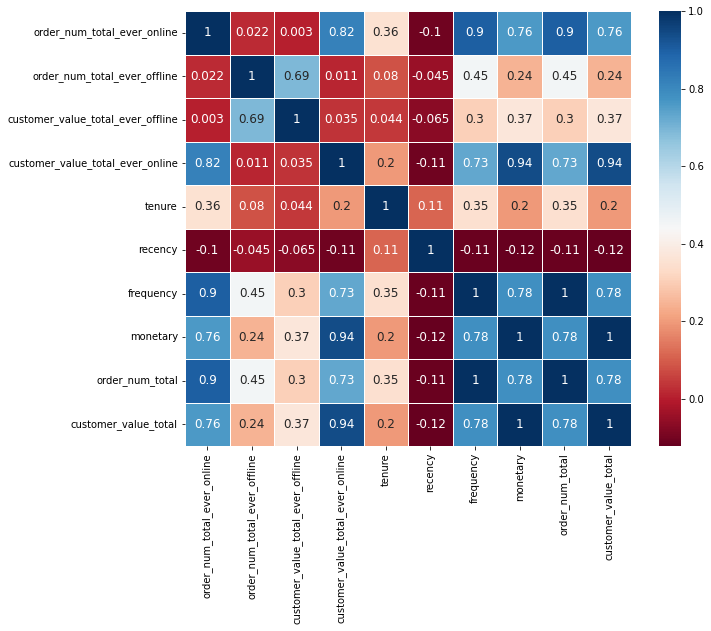

In [10]:
correlation_matrix(df, num_cols)

In [11]:
cat_cols = ["order_channel", "last_order_channel"]

In [12]:
df[cat_cols].nunique()

order_channel         4
last_order_channel    5
dtype: int64

In [13]:
for col in cat_cols:
    print(df[col].unique())

['Android App' 'Desktop' 'Mobile' 'Ios App']
['Offline' 'Mobile' 'Android App' 'Desktop' 'Ios App']


In [14]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [15]:
df = one_hot_encoder(df, cat_cols)

In [16]:
df.head()

,master_id,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,...,monetary,order_num_total,customer_value_total,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline
0,cc294636-19f0-11eb-8d74-000d3a38a36f,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],...,939.37,5.0,939.37,0,0,0,0,0,0,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",...,2013.55,21.0,2013.55,0,0,0,0,0,1,0
2,69b69676-1a40-11ea-941b-000d3a38a36f,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",...,585.32,5.0,585.32,0,0,0,0,0,0,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",...,121.97,2.0,121.97,0,0,0,0,0,0,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],...,209.98,2.0,209.98,1,0,0,1,0,0,0


# TASK 2. Customer Segmentation with K-Means

# Step 2.1. Standardization of Variables

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df[num_cols])
X = pd.DataFrame(X, columns=num_cols)
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508


# Step 2.2. Specifying Optimum Clustering Number

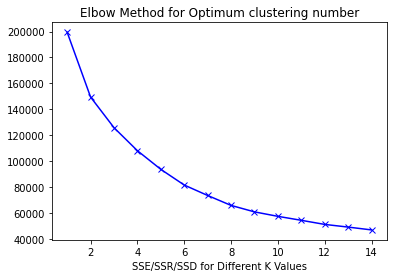

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans()
ssd = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    ssd.append(kmeans.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("SSE/SSR/SSD for Different K Values")
plt.title("Elbow Method for Optimum clustering number")
plt.show()

In [19]:
# pip install yellowbrick

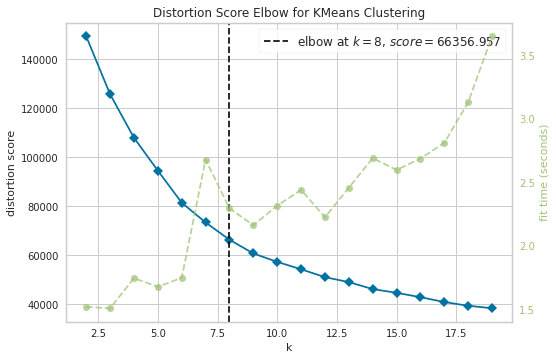

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X)
elbow.show(block=True)

In [21]:
elbow.elbow_value_

8

# Step 2.3. Modelling and Segmentation of Customers

In [22]:
kmeans = KMeans(n_clusters=elbow.elbow_value_, init='k-means++', random_state=1).fit(X)
kmeans.cluster_centers_ 

array([[-0.14128145,  1.42426001,  1.71940976, -0.08952695, -0.04203676,
        -0.29829641,  0.49361521,  0.49577523,  0.49361521,  0.49577523],
       [ 0.06525193, -0.04261322, -0.06116596, -0.1233148 ,  2.27896708,
         0.29127646,  0.03960305, -0.13526401,  0.03960305, -0.13526401],
       [ 4.31081272,  0.29487665,  0.22495673,  3.46407825,  1.45929303,
        -0.42157153,  3.96909779,  3.29687599,  3.96909779,  3.29687599],
       [-0.27520623, -0.183983  , -0.19364266, -0.21968176, -0.4417766 ,
        -0.64102259, -0.32522761, -0.26948457, -0.32522761, -0.26948457],
       [-0.31208094, -0.19717109, -0.23167443, -0.25512885, -0.25071556,
         1.16871776, -0.36381843, -0.31525299, -0.36381843, -0.31525299],
       [ 0.04658278, 25.28712872, 18.67014342,  0.3528747 , -0.03952635,
         0.07078788, 11.04035317,  6.6154248 , 11.04035317,  6.6154248 ],
       [20.32618901, -0.16602674,  0.860791  , 32.33279837,  1.6305654 ,
        -0.8910832 , 18.03796981, 30.3549695 

In [23]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

In [24]:
clusters_kmeans = kmeans.labels_
X["cluster"] = clusters_kmeans   
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,cluster
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,3
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,2
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,4
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,3
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,3


In [25]:
X["cluster"].value_counts()            
X["cluster"].value_counts() / len(X) * 100

3    43.750313
4    27.570820
7     9.726749
0     8.503384
1     8.428177
2     1.920281
5     0.065179
6     0.035097
Name: cluster, dtype: float64

# Step 2.4. Statistical Analysis of Each Segment

In [26]:
X.groupby('cluster').agg(['mean', 'median', 'count', 'std']).T

cluster                                             0            1  \
order_num_total_ever_online       mean      -0.141214     0.065556   
                                  median    -0.262891    -0.026234   
                                  count   1696.000000  1681.000000   
                                  std        0.393056     0.520256   
order_num_total_ever_offline      mean       1.423731    -0.043052   
                                  median     1.011275    -0.443039   
                                  count   1696.000000  1681.000000   
                                  std        1.108158     0.537401   
customer_value_total_ever_offline mean       1.718705    -0.060912   
                                  median     1.409475    -0.212031   
                                  count   1696.000000  1681.000000   
                                  std        1.259153     0.582982   
customer_value_total_ever_online  mean      -0.089342    -0.123157   
                                  median    -0.203009    -0.192620   
                                  count   1696.000000  1681.000000   
                                  std        0.381814     0.346559   
tenure                            mean      -0.042527     2.281095   
                                  median    -0.182090     2.261624   
                                  count   1696.000000  1681.000000   
                                  std        0.654283     0.823896   
recency                           mean      -0.298100     0.290024   
                                  median    -0.498248     0.179530   
                                  count   1696.000000  1681.000000   
                                  std        0.806003     0.993876   
frequency                         mean       0.493445     0.039683   
                                  median     0.416488    -0.005222   
                                  count   1696.000000  1681.000000   
                                  std        0.589289     0.491110   
monetary                          mean       0.495710    -0.135032   
                                  median     0.379471    -0.168269   
                                  count   1696.000000  1681.000000   
                                  std        0.552945     0.342119   
order_num_total                   mean       0.493445     0.039683   
                                  median     0.416488    -0.005222   
                                  count   1696.000000  1681.000000   
                                  std        0.589289     0.491110   
customer_value_total              mean       0.495710    -0.135032   
                                  median     0.379471    -0.168269   
                                  count   1696.000000  1681.000000   
                                  std        0.552945     0.342119   

cluster                                            2            3  \
order_num_total_ever_online       mean      4.310813    -0.275231   
                                  median    3.996919    -0.499547   
                                  count   383.000000  8726.000000   
                                  std       2.008758     0.295065   
order_num_total_ever_offline      mean      0.294877    -0.184153   
                                  median    0.041732    -0.443039   
                                  count   383.000000  8726.000000   
                                  std       1.082721     0.370243   
customer_value_total_ever_offline mean      0.224957    -0.193833   
                                  median   -0.209610    -0.311525   
                                  count   383.000000  8726.000000   
                                  std       1.264995     0.437557   
customer_value_total_ever_online  mean      3.464078    -0.219735   
                                  median    2.954954    -0.304423   
                                  count   383.000000  8726.000000   
                         

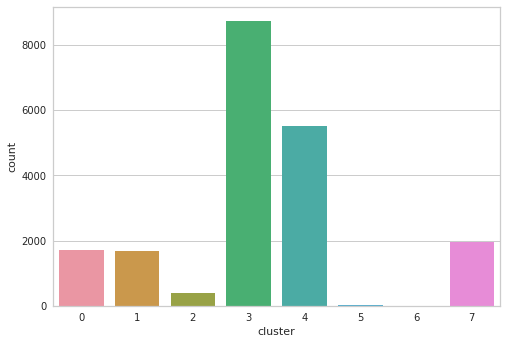

In [27]:
sns.countplot(x='cluster', data=X)
plt.show()

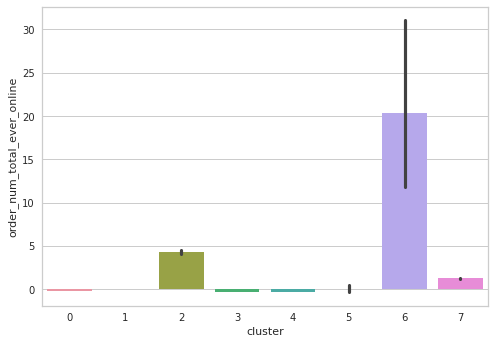

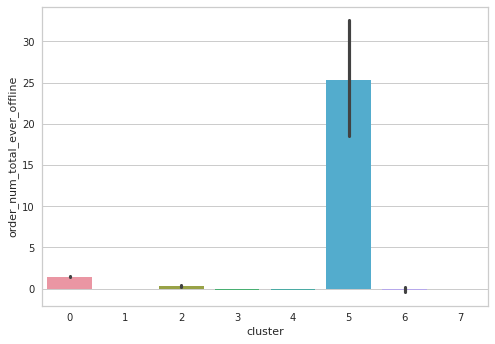

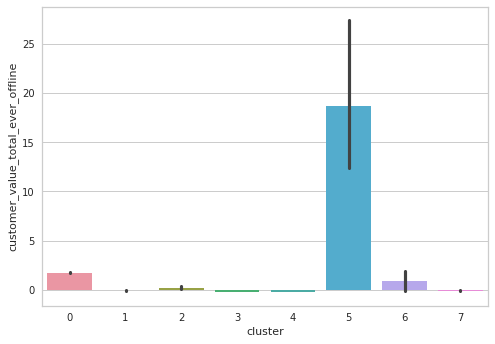

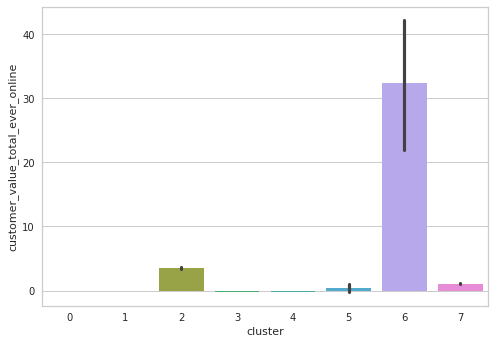

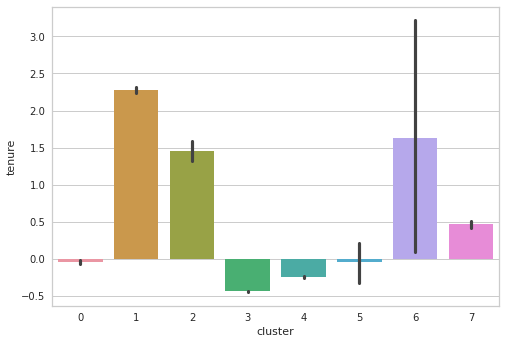

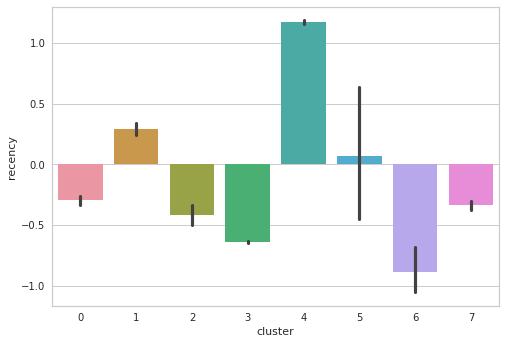

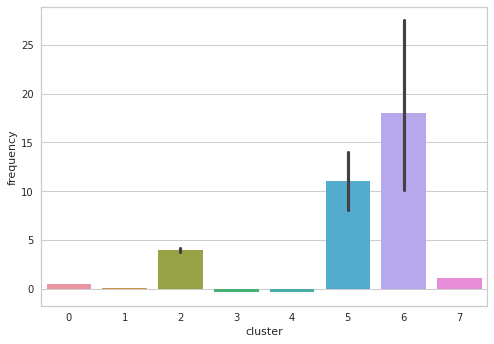

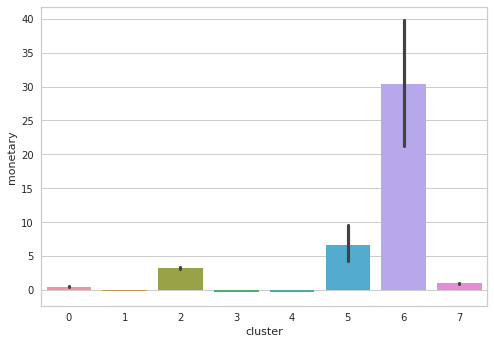

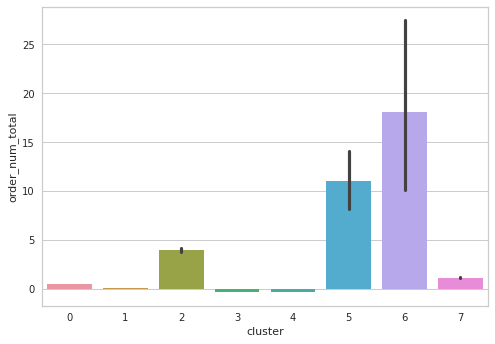

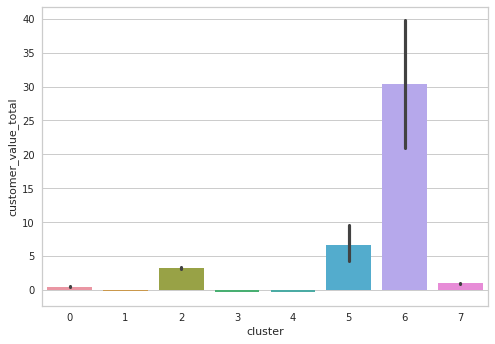

In [28]:
for i in num_cols:
    sns.barplot(x='cluster', y=i, data=X)
    plt.show()

# TASK 3. Customer Segmentation with Hiearchical Clustering 

# Step 3.1. Specifying Optimum Clustering Number by Using Standardized DataFrame in Task 2

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

hc_average = linkage(X, "average")  
hc_ward = linkage(X, "ward")  
hc_complete = linkage(X, "complete") 
hc_single = linkage(X, "single")  
hc_centroid = linkage(X, "centroid")

In [30]:
def plot_hc(hc_type):
    plt.figure(figsize=(7, 5))
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Observation Units")
    plt.ylabel("Distances")
    dendrogram(hc_type,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)
    plt.show()

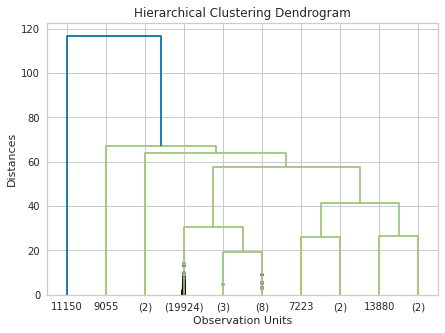

In [31]:
plot_hc(hc_average)

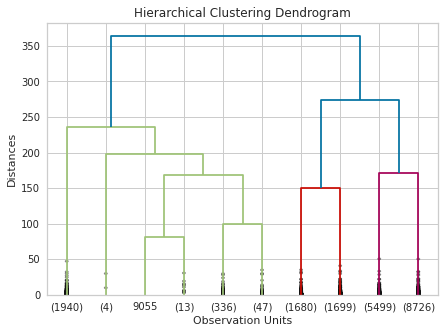

In [32]:
plot_hc(hc_ward)

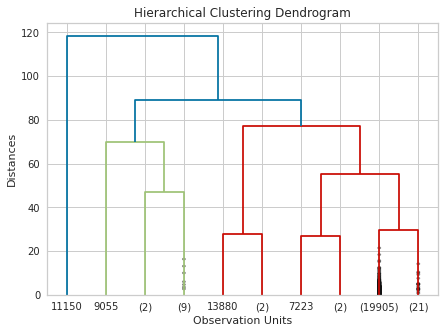

In [33]:
plot_hc(hc_complete)

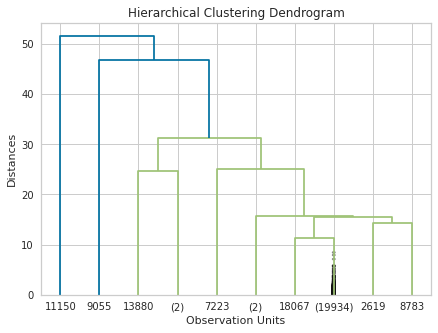

In [34]:
plot_hc(hc_single)

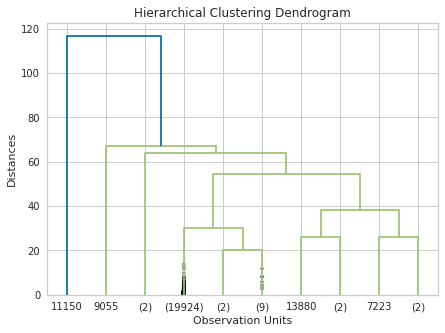

In [35]:
plot_hc(hc_centroid)

# Step 3.2. Creating Model and Segmentation of Customers

In [36]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X)
clusters_hc
X['cluster_hc'] = clusters_hc
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,cluster,cluster_hc
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,3,1
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,2,0
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,4,1
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,3,1
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,3,1


In [37]:
X["cluster_hc"].unique()

array([1, 0, 2])

In [38]:
X["cluster_hc"].value_counts()

1    14225
2     3379
0     2341
Name: cluster_hc, dtype: int64

# Step 3.3. Statistical Analysis of Each Segment

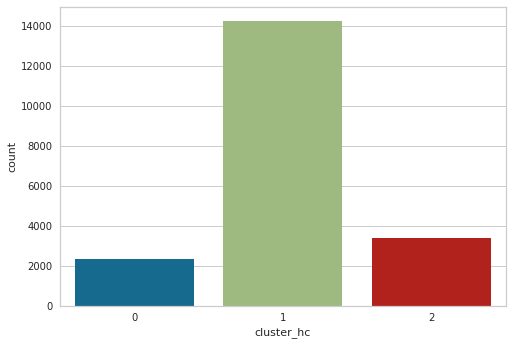

In [39]:
sns.countplot(x='cluster_hc', data=X)
plt.show()

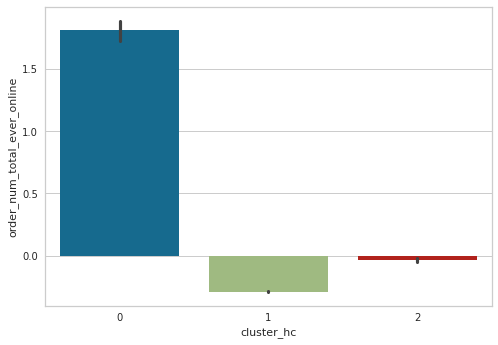

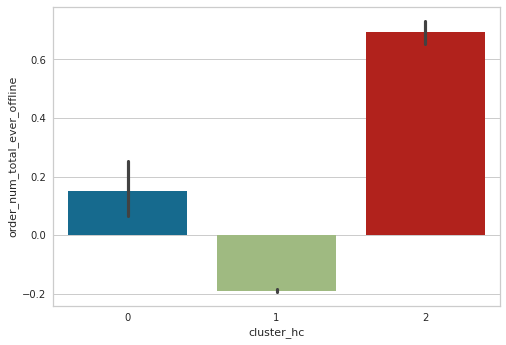

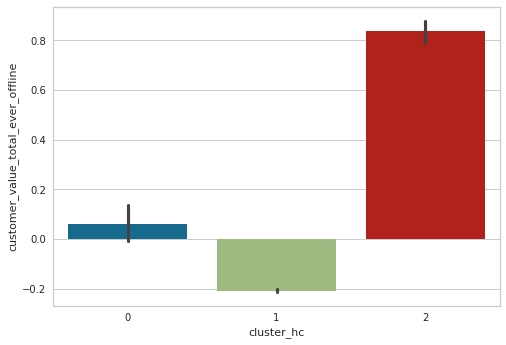

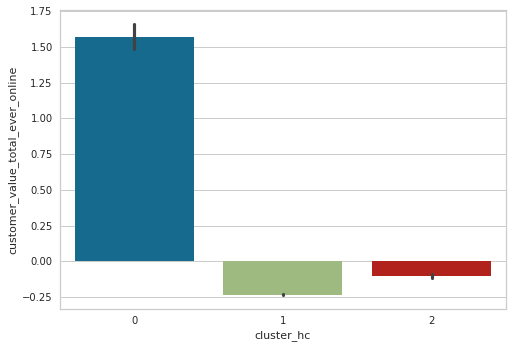

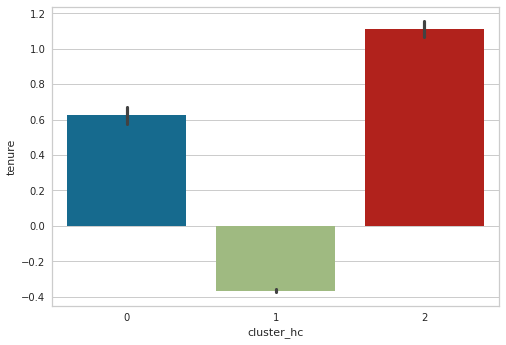

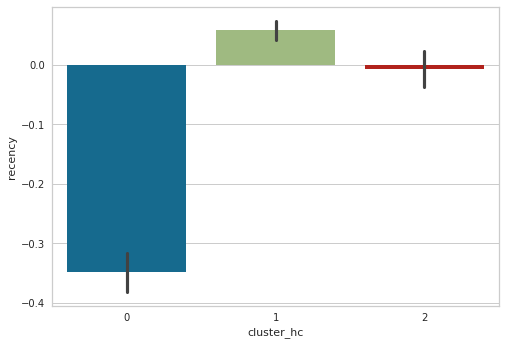

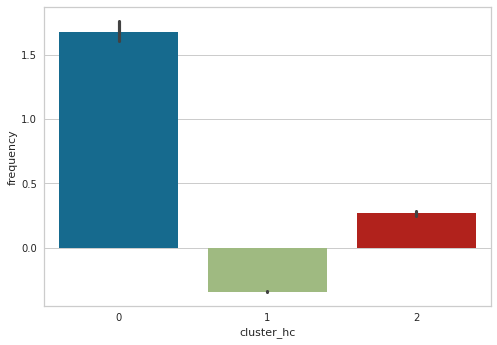

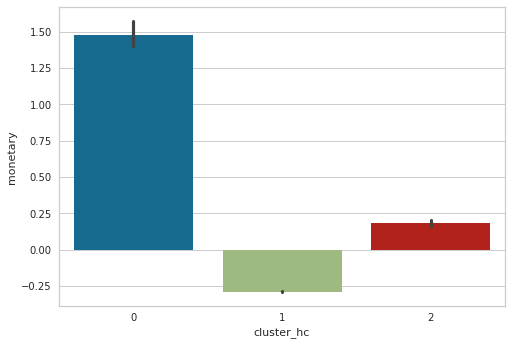

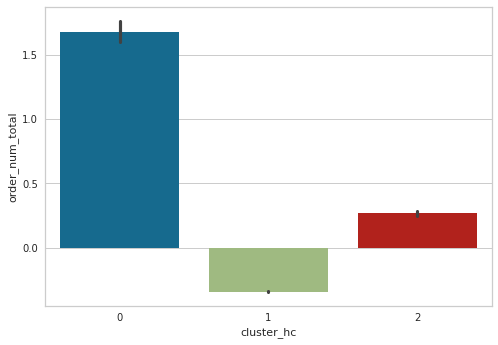

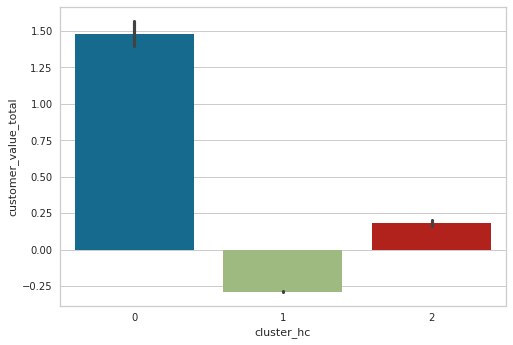

In [40]:
for i in num_cols:
    sns.barplot(x='cluster_hc', y=i, data=X)
    plt.show()